<img src="Images/Logo.png" width="15%" align="right" hpsace="50">

# Text Mining Harry Potter

We will be using data provided by [Bradley Boehmke](https://github.com/bradleyboehmke/harrypotter)

The goal of this class is to do a textual analysis of the seven Harry Potter books. We will use Python to discover some interesting insights that maybe nobody else in the world has realized about the Harry Potter books!

These are the books we will be analyzing:

1. Harry Potter and the Sorcerer's Stone
2. Harry Potter and the Chamber of Secrets
3. Harry Potter and the Prisoner of Azkaban
4. Harry Potter and the Goblet of Fire
5. Harry Potter and the Order of the Phoenix
6. Harry Potter and the Half-Blood Prince
7. Harry Potter and the Deathly Hallows

<img src="Images/book_covers.png" width="50%" align="center" hpsace="50">

## Loading extensions

In [2]:
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# plt.style.use('ggplot')
plt.xkcd()
matplotlib.rcParams.update({'font.size': 14})

from wordcloud import WordCloud, STOPWORDS

## Reading data

To be able to work with the books, we first need to load them into a Python variable. The books are stored in text files, one in each file, which are listed in the `files_to_read` list below. We will use a `for` loop to go through the list file by file and load each book into another list.

To run the code below, select the cell and press `shift` + `enter` or press the little "play" button in the bar on top that looks like this: 

<img src="Images/ipython_bar.png" width="50%" align="center" hpsace="50">

In [4]:
# list of files containing the data we will be using -- the seven Harry Potter books!
files_to_read = [
    'Data/01_philosophers_stone.txt', 
    'Data/02_chamber_of_secrets.txt', 
    'Data/03_prisoner_of_azkaban.txt', 
    'Data/04_goblet_of_fire.txt',
    'Data/05_order_of_the_phoenix.txt',
    'Data/06_half_blood_prince.txt', 
    'Data/07_deathly_hallows.txt']

# we will load the books into a list called 'books'
books = []

# this for loap opens each file in the 'files_to_read' list and loads the contents of the file
for file_name in files_to_read:
    with open(file_name) as input_file:
        books.append(input_file.read())

Now we have a list called `books` which contains all seven book. This is the length of the list

In [5]:
print(len(books))

7


It contains seven text elements, each is one of the books. For example, we can print the first 500 characters of the first book.

Remember that in python, list elements can be accessed using indexing and that the index values start from 0. That means the first book is stored in the list on the zero-th position.

If you were to run the following command: 

`print(books[0])`

That would print the whole first book. (You can try that if you want!)

In Python, strings (of text) are also considered lists. So, to print the first 500 characters of the book, we can also use indexing:

In [22]:
book_1 = books[0]

print(book_1[0:1000])

# or you could siply write
# print(books[0][0:500])

 THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.　　The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they hadn't

## Which book is the longest?

Lets start by counting the total number of words in each book. Right now, each book is represented as a string of text. To count words, we will need to split the text into separate words. Fortunately, Python has a neat function that lets us do that. It's called simply `split`!

The following code will split the first book into separate words. We will print the first few words.

In [7]:
words = book_1.split()

print(words[0:26])

['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']


To count how many words are in the first book we can use another neat Python function: `len` (which stands for "length"). `len` can tell us how long the list of words we just created is.

In [8]:
print(len(words))

78411


That's right, the first book contains more than 78 thousand words!

To do this for all seven books, we can use a `for` loop. The `enumerate` keeps a counter for us, which helps us tell which book we are analyzing during each step of the loop. 

In [9]:
for book_number, book in enumerate(books):
    words = book.split()
    print('Book', book_number + 1, 'contains', len(words))

Book 1 contains 78411
Book 2 contains 86615
Book 3 contains 106031
Book 4 contains 195407
Book 5 contains 265621
Book 6 contains 171558
Book 7 contains 192331


Let's visualize this!

We will use a Python extension called `matplotlib` which we already loaded above.

First, we will count the number of words in each book again. This time instead of printing the count we will save the count in a new variable.

In [10]:
words_per_book = []
for book in books:
    words = book.split()
    words_per_book.append(len(words))
print(words_per_book)

[78411, 86615, 106031, 195407, 265621, 171558, 192331]


Now that we have the word counts in a variable, we can pass the variable to `maplotlib` to create a plot. 

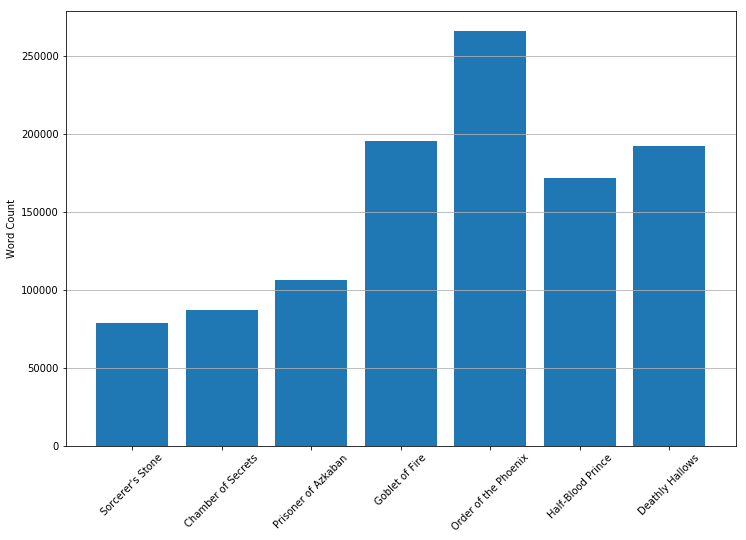

In [11]:
# this tells matplotlib how large should the figure be
plt.figure(figsize=(12, 8))

# this creates the plot
number_of_books = len(books)
positions = range(number_of_books)
plt.bar(positions, words_per_book)

# this attaches names of the books to the bars
plt.xticks(positions, (
    'Sorcerer\'s Stone', 'Chamber of Secrets', 'Prisoner of Azkaban', 'Goblet of Fire', 'Order of the Phoenix', 
    'Half-Blood Prince', 'Deathly Hallows'), rotation=45)
plt.ylabel('Word Count')

# this shows the horizontal lines
plt.gca().yaxis.grid(True)

# and this displays the plot!
plt.show()

## Most popular words

We will try to find out which words are the most popular in each book.

We already know how to split each book into words, but this time we will need to do an additional step -- convert all words to lowercase. 

This is because in Python "Harry" and "HARRY" is otherwise considered to be two different words. Therefore, we want to convert all words to lowercase.

In [12]:
words = book_1.split()

print('Words before:', words[0:26])
print()

lowercase_words = []
for word in words:
    lowercase_words.append(word.lower())
    
print('Words after:', lowercase_words[0:26])

Words before: ['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']

Words after: ['the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley,', 'of', 'number', 'four,', 'privet', 'drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.']


We can use `Counter` to count occurences of all words and `matplotlib` to visualize the results:

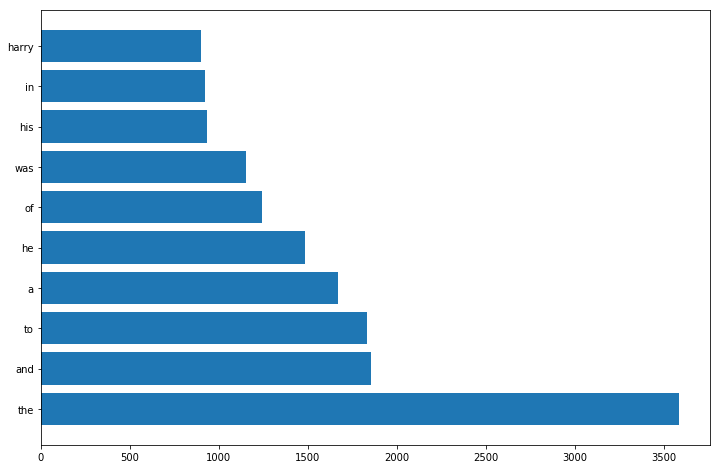

In [13]:
top_10 = Counter(lowercase_words).most_common(10)
top_10_words = []
top_10_counts = []
for word, count in top_10:
    top_10_words.append(word)
    top_10_counts.append(count)
    
plt.figure(figsize=(12, 8))

positions = range(len(top_10))
plt.barh(positions, top_10_counts)

plt.yticks(positions, top_10_words)
plt.show()

What happened?

Explain stopwords.

In [14]:
stopwords_file = 'Data/stopwords.txt'
with open(stopwords_file) as input_file:
    stopwords = input_file.read().split()
print(stopwords[0:10])

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']


In [15]:
words_without_stopwords = []
for word in lowercase_words:
    if word not in stopwords and word != 'said':
        words_without_stopwords.append(word)
print(words_without_stopwords[0:10])

['boy', 'lived', 'mr.', 'mrs.', 'dursley,', 'number', 'four,', 'privet', 'drive,', 'proud']


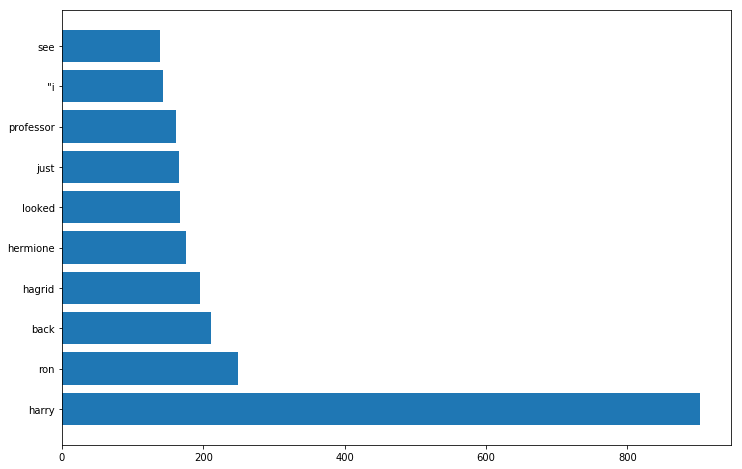

In [16]:
top_10 = Counter(words_without_stopwords).most_common(10)
top_10_words = []
top_10_counts = []
for word, count in top_10:
    top_10_words.append(word)
    top_10_counts.append(count)
    
plt.figure(figsize=(12, 8))

positions = range(len(top_10))
plt.barh(positions, top_10_counts)

plt.yticks(positions, top_10_words)
plt.show()

What about combinations of words?

Explain n-grams

In [17]:
pairs = list(zip(words_without_stopwords, words_without_stopwords[1:]))
bigrams = []
for pair in pairs:
    bigrams.append(pair[0] + ' ' + pair[1])
print(bigrams[0:10])

['boy lived', 'lived mr.', 'mr. mrs.', 'mrs. dursley,', 'dursley, number', 'number four,', 'four, privet', 'privet drive,', 'drive, proud', 'proud say']


In [18]:
Counter(bigrams).most_common(10)

[('uncle vernon', 71),
 ('professor mcgonagall', 61),
 ('aunt petunia', 42),
 ('mr. dursley', 27),
 ('harry ron', 27),
 ('harry looked', 23),
 ('harry felt', 20),
 ('uncle vernon,', 16),
 ('ron hermione', 16),
 ('nimbus two', 15)]

## Spells

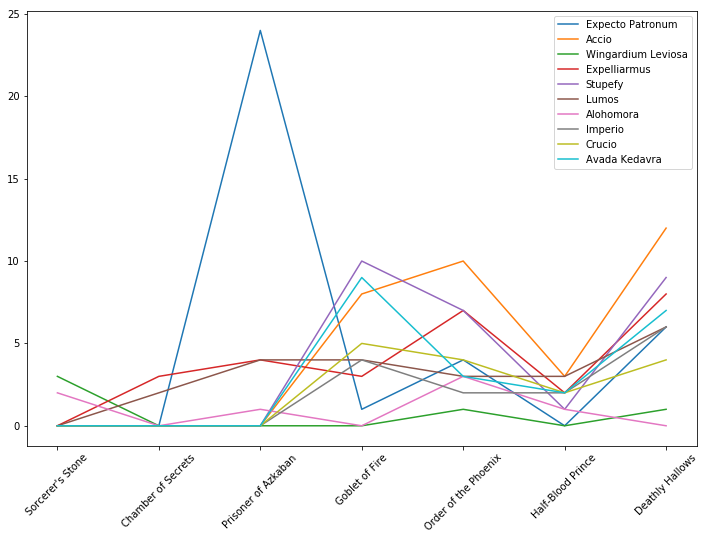

In [19]:
spells = [
    'Expecto Patronum', 'Accio', 'Wingardium Leviosa', 'Expelliarmus', 'Stupefy', 'Lumos', 'Alohomora', 
    'Imperio', 'Crucio', 'Avada Kedavra']

plt.figure(figsize=(12, 8))
positions = range(len(books))

for spell in spells:
    spell_count = []
    for book in books:
        book = book.lower()
        spell_count.append(book.count(spell.lower()))
    plt.plot(positions, spell_count, label=spell)
    
plt.xticks(positions, (
    'Sorcerer\'s Stone', 'Chamber of Secrets', 'Prisoner of Azkaban', 'Goblet of Fire', 'Order of the Phoenix', 
    'Half-Blood Prince', 'Deathly Hallows'), rotation=45)
    
plt.legend()
plt.show()

## Locations

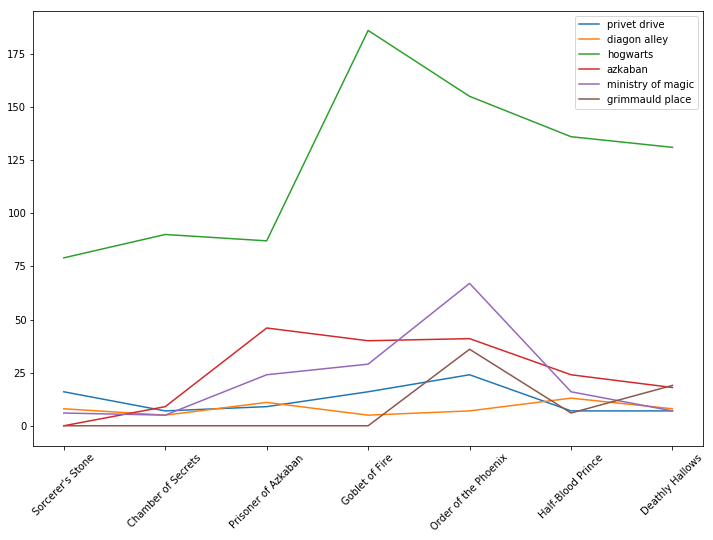

In [20]:
locations = ['privet drive', 'diagon alley', 'hogwarts', 'azkaban', 'ministry of magic', 'grimmauld place']

plt.figure(figsize=(12, 8))
positions = range(len(books))

for location in locations:
    location_count = []
    for book in books:
        book = book.lower()
        location_count.append(book.count(location.lower()))
    plt.plot(positions, location_count, label=location)
    
plt.xticks(positions, (
    'Sorcerer\'s Stone', 'Chamber of Secrets', 'Prisoner of Azkaban', 'Goblet of Fire', 'Order of the Phoenix', 
    'Half-Blood Prince', 'Deathly Hallows'), rotation=45)
    
plt.legend()
plt.show()

## Word clouds

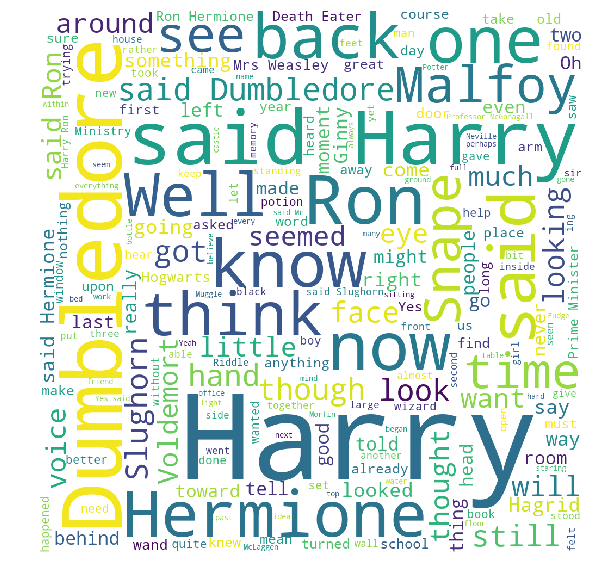

In [21]:
wc = WordCloud(width=1000, height=1000, background_color="white", stopwords=STOPWORDS).generate(books[5])
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(wc);